In [1]:
%pip install pandas
%pip install transformers
%pip install torch
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('spam_re_labelled_vNew.csv', sep=';', encoding='latin1')
df

,text,re_labelled
0,"@thorxxrahman Enggeh leres masuk kec.Ngaglik, ...",HAM
1,Personil Polres mukomuko melaksanakan Sosialis...,HAM
2,ga enaknya rumah pinggir jalan besar + ada bay...,HAM
3,@KangManto123 Berarti pengusaha knalpot brong ...,HAM
4,@zeynixxtflhn Beli knalpot blombongan ga?,HAM
...,...,...
455,Gayaa,HAM
456,"golek tambahan kiper mbok an, ngawekani nek ik...",HAM
457,Ayoo lekk semngat sampai juara dunia Indonesia...,HAM
458,????????????,SPAM


# Combined Dataset

In [4]:
df.rename(columns={'re_labelled': 'Kategori', 'text': 'Pesan'}, inplace=True)
df

,Pesan,Kategori
0,"@thorxxrahman Enggeh leres masuk kec.Ngaglik, ...",HAM
1,Personil Polres mukomuko melaksanakan Sosialis...,HAM
2,ga enaknya rumah pinggir jalan besar + ada bay...,HAM
3,@KangManto123 Berarti pengusaha knalpot brong ...,HAM
4,@zeynixxtflhn Beli knalpot blombongan ga?,HAM
...,...,...
455,Gayaa,HAM
456,"golek tambahan kiper mbok an, ngawekani nek ik...",HAM
457,Ayoo lekk semngat sampai juara dunia Indonesia...,HAM
458,????????????,SPAM


In [5]:
# df1 = pd.read_csv('combined_dataset.csv')
# df1

In [6]:
# gabungan_df = pd.concat([df, df1], ignore_index=True)

# # Jika ingin memastikan hanya kolom 'Kategori' dan 'Pesan' yang ada
# gabungan_df = gabungan_df[['Kategori', 'Pesan']]
# gabungan_df

In [7]:
# gabungan_df.to_csv('gabungan_dataset.csv', index=False)

# Re-train Model

In [8]:
# Install libraries
%pip install transformers datasets scikit-learn seaborn matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Import libraries
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Dataset
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

/Users/adsdigitalpartner/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/adsdigitalpartner/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Load dataset
# df = pd.read_csv("gabungan_dataset.csv")
df['Kategori'] = df['Kategori'].str.lower()
df['Kategori'] = df['Kategori'].apply(lambda x: 1 if x == 'spam' else 0)
df

,Pesan,Kategori
0,"@thorxxrahman Enggeh leres masuk kec.Ngaglik, ...",0
1,Personil Polres mukomuko melaksanakan Sosialis...,0
2,ga enaknya rumah pinggir jalan besar + ada bay...,0
3,@KangManto123 Berarti pengusaha knalpot brong ...,0
4,@zeynixxtflhn Beli knalpot blombongan ga?,0
...,...,...
455,Gayaa,0
456,"golek tambahan kiper mbok an, ngawekani nek ik...",0
457,Ayoo lekk semngat sampai juara dunia Indonesia...,0
458,????????????,1


In [11]:
tokenizer = AutoTokenizer.from_pretrained("nahiar/spam-detection-bert-v1")
model = AutoModelForSequenceClassification.from_pretrained("nahiar/spam-detection-bert-v1")

In [12]:
# Preprocessing - Tokenize the email messages
def tokenize_function(text):
    # Fungsi untuk men-tokenisasi teks email dan mengubahnya menjadi input untuk model
    return tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors="pt")

In [13]:
# Tokenizing email messages
texts = list(df['Pesan'])  # Mengambil semua teks dari kolom 'Pesan'
labels = list(df['Kategori'])  # Mengambil semua Kategori (0 atau 1)
tokenized_texts = [tokenize_function(text) for text in texts]  # Tokenisasi semua teks

In [14]:
# Prepare input tensors for PyTorch
# Menggabungkan token input dan attention mask menjadi tensor yang siap digunakan untuk training
input_ids = torch.cat([x['input_ids'] for x in tokenized_texts], dim=0)
attention_masks = torch.cat([x['attention_mask'] for x in tokenized_texts], dim=0)
labels = torch.tensor(labels)

In [15]:
# Membagi dataset menjadi data training dan data validasi (80% training, 20% testing)
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2)
train_masks, val_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.2)

In [16]:
# Membuat DataLoader untuk mini-batch training dan validation
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = torch.utils.data.RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = torch.utils.data.SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [17]:
# Training setup
from torch.optim import AdamW

# Optimizer digunakan untuk mengupdate parameter model selama training
optimizer = AdamW(model.parameters(), lr=2e-5)

In [18]:
from tqdm import tqdm

epochs = 3
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train()

    total_loss = 0

    # Tambahkan tqdm untuk loop training
    train_loop = tqdm(train_dataloader, desc="Training", leave=False)

    for batch in train_loop:
        batch_input_ids, batch_attention_mask, batch_labels = batch

        optimizer.zero_grad()

        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        # Update progress bar dengan current loss
        train_loop.set_postfix(loss=loss.item())

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss:.4f}")

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    predictions_list = []
    true_labels_list = []

    val_loop = tqdm(validation_dataloader, desc="Validating", leave=False)

    with torch.no_grad():
        for batch in val_loop:
            batch_input_ids, batch_attention_mask, batch_labels = batch
            outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)

            predictions_list.extend(predictions.tolist())
            true_labels_list.extend(batch_labels.tolist())

            correct += (predictions == batch_labels).sum().item()
            total += batch_labels.size(0)

    accuracy = correct / total
    print(f"Validation Accuracy: {accuracy * 100:.2f}%")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



Epoch 1/3


Average training loss: 0.3700


Validation Accuracy: 96.74%

Epoch 2/3


Average training loss: 0.0642


Validation Accuracy: 96.74%

Epoch 3/3


Average training loss: 0.0256


Validation Accuracy: 96.74%


Confusion Matrix:
[[88  0]
 [ 3  1]]


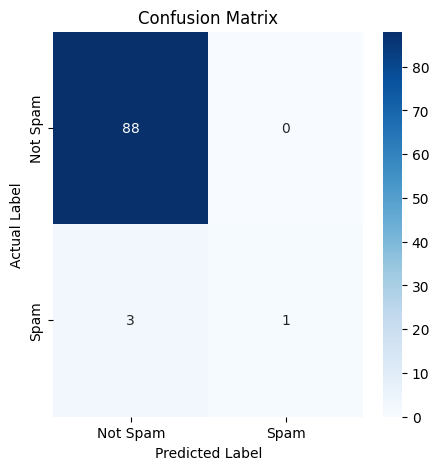

In [19]:
# Confusion Matrix & Evaluation Metrics
cm = confusion_matrix(true_labels_list, predictions_list)
print(f"Confusion Matrix:\n{cm}")

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Generate and print the classification report
classification_rep = classification_report(true_labels_list, predictions_list, target_names=['not spam', 'spam'])
print(f"Classification Report:\n{classification_rep}")

Classification Report:
              precision    recall  f1-score   support

    not spam       0.97      1.00      0.98        88
        spam       1.00      0.25      0.40         4

    accuracy                           0.97        92
   macro avg       0.98      0.62      0.69        92
weighted avg       0.97      0.97      0.96        92



In [21]:
# Save model

model.save_pretrained("nahiar-spam-detection-bert-v2")
tokenizer.save_pretrained("nahiar-spam-detection-bert-v2")

('nahiar-spam-detection-bert-v2/tokenizer_config.json',
 'nahiar-spam-detection-bert-v2/special_tokens_map.json',
 'nahiar-spam-detection-bert-v2/vocab.txt',
 'nahiar-spam-detection-bert-v2/added_tokens.json',
 'nahiar-spam-detection-bert-v2/tokenizer.json')

In [22]:
tokenizer = AutoTokenizer.from_pretrained("./nahiar-spam-detection-bert-v2")
model = AutoModelForSequenceClassification.from_pretrained("./nahiar-spam-detection-bert-v2")

In [23]:
# Define a function
def predict_spam(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    probs = torch.softmax(outputs.logits, dim=1)
    predicted_label = torch.argmax(probs, dim=1).item()
    label_map = {0: "HAM", 1: "SPAM"}
    return label_map[predicted_label]

In [24]:
# Percobaan prediksi apakah pesan adalah spam atau bukan
input_text = 'Senin, 21 Juli 2025, Samapta Polsek Ngaglik melaksanakan patroli stasioner balong jalan palagan donoharjo serta antisipasi gangguan Kamtibmas, Curat, Curas, Curan dan kejahatan jalanan di wilayah Ngaglik. https://t.co/TyIvxehCV9'
print(predict_spam(input_text, model, tokenizer))

HAM


In [25]:
input_text = 'lacak hp hilang by no hp / imei lacak penipu/scammer/tabrak lari/terror/revengeporn sadap / hack / pulihkan akun #zonauang #zonauang?'
print(predict_spam(input_text, model, tokenizer))

SPAM


In [26]:
input_text = 'Mari berkontribusi terhadap gerakan rakyat dengan membeli baju ini seharga Rp 160.000. Berikut format pemesanannya:  Nama: Alamat: Nomor WA: Ukuran:  Hubungi kami melalui WA 08977472296  *Harga di atas di luar ongkos kirim*'
print(predict_spam(input_text, model, tokenizer))

SPAM


In [36]:
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm

model_path = "./nahiar/spam-detection-bert-v2"

try:
    tokenizer = AutoTokenizer.from_pretrained(model_path, local_files_only=True)
    model = AutoModelForSequenceClassification.from_pretrained(model_path, local_files_only=True)
    print("✅ Model dan Tokenizer berhasil dimuat dari lokal!")
except Exception as e:
    print("❌ Gagal memuat model/tokenizer:", e)

# Load dataset dari file CSV (ganti dengan nama file yang kamu punya)
file_name = "spam_re_labelled_vNew.csv"  # Ganti dengan nama file asli kamu
df = pd.read_csv(file_name, encoding='latin1', sep=';')

# Fungsi prediksi
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        pred_class = torch.argmax(probs, dim=-1).item()
        confidence = probs[0][pred_class].item()
        label = "spam" if pred_class == 1 else "ham"
    return label, confidence

# Prediksi seluruh data
predictions = []
confidences = []

for text in tqdm(df['text']):
    label, confidence = predict(str(text))
    predictions.append(label)
    confidences.append(confidence)

# Simpan hasil prediksi ke CSV
df['predicted_label'] = predictions
df['confidence'] = confidences

output_file = "hasil_prediksi_Newest.csv"
df.to_csv(output_file, index=False)

print(f"Hasil prediksi berhasil disimpan di {output_file}")

❌ Gagal memuat model/tokenizer: Repo id must be in the form 'repo_name' or 'namespace/repo_name': './nahiar/spam-detection-bert-v2'. Use `repo_type` argument if needed.


100%|██████████| 460/460 [00:14<00:00, 31.20it/s]

Hasil prediksi berhasil disimpan di hasil_prediksi_Newest.csv


In [37]:
df

,text,re_labelled,predicted_label,confidence
0,"@thorxxrahman Enggeh leres masuk kec.Ngaglik, ...",HAM,ham,0.999693
1,Personil Polres mukomuko melaksanakan Sosialis...,HAM,ham,0.998857
2,ga enaknya rumah pinggir jalan besar + ada bay...,HAM,ham,0.995681
3,@KangManto123 Berarti pengusaha knalpot brong ...,HAM,ham,0.999069
4,@zeynixxtflhn Beli knalpot blombongan ga?,HAM,ham,0.999579
...,...,...,...,...
455,Gayaa,HAM,ham,0.995908
456,"golek tambahan kiper mbok an, ngawekani nek ik...",HAM,ham,0.998731
457,Ayoo lekk semngat sampai juara dunia Indonesia...,HAM,ham,0.998519
458,????????????,SPAM,spam,0.995833


Classification Report:

              precision    recall  f1-score   support

         HAM       0.99      1.00      0.99       430
        SPAM       1.00      0.83      0.91        30

    accuracy                           0.99       460
   macro avg       0.99      0.92      0.95       460
weighted avg       0.99      0.99      0.99       460



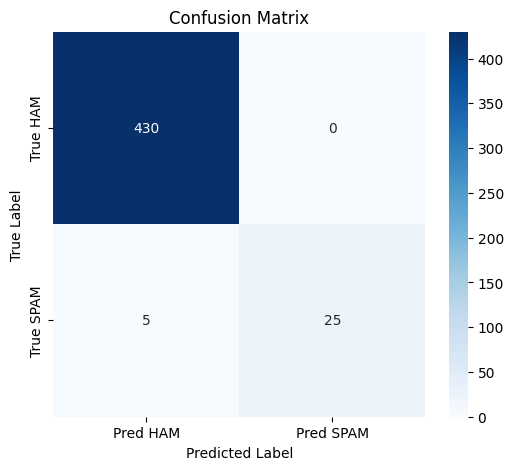

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['re_labelled'] = df['re_labelled'].str.upper()
df['predicted_label'] = df['predicted_label'].str.upper()

df_filtered = df[df['re_labelled'].isin(['HAM', 'SPAM'])].copy()

true_labels = df_filtered['re_labelled'].map({'HAM': 0, 'SPAM': 1}).values
pred_labels = df_filtered['predicted_label'].map({'HAM': 0, 'SPAM': 1}).values

# Classification Report
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=['HAM', 'SPAM']))

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred HAM', 'Pred SPAM'], yticklabels=['True HAM', 'True SPAM'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()